In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('analysis_data.csv')

In [3]:
df.drop(columns=['Unnamed: 0'],axis= 1, inplace=True)

In [4]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,ApprovalDateYear,ChgOffDateYear,ApprovalDateMonth,DisbursementDateYear,UrbanRural_Encoded,Region,BankRegion,TermDays,LoanDateEnd,Reccession
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,...,1997,1970,2,1999,0,Eastern,Eastern,2520,2006-01-22,0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,...,1997,1970,2,1997,0,Eastern,Eastern,1800,2002-05-05,0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,...,1997,1970,2,1997,0,Eastern,Eastern,5400,2012-10-13,0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,...,1997,1970,2,1997,0,Eastern,Eastern,1800,2002-06-04,0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,...,1997,1970,2,1997,0,Eastern,Eastern,7200,2017-01-29,0


In [5]:
wdf = df.copy()

## Univariate Statistics

#### City
- Which cities have the highest approval rates? 

In [6]:
pd.set_option('display.max_row', None)

cities_approval = pd.DataFrame({'Count': wdf['City'].value_counts()}).reset_index()
cities_approval = cities_approval.rename(columns={'index': 'City'})
selected_cities = cities_approval.head(10)

<Figure size 1000x600 with 0 Axes>

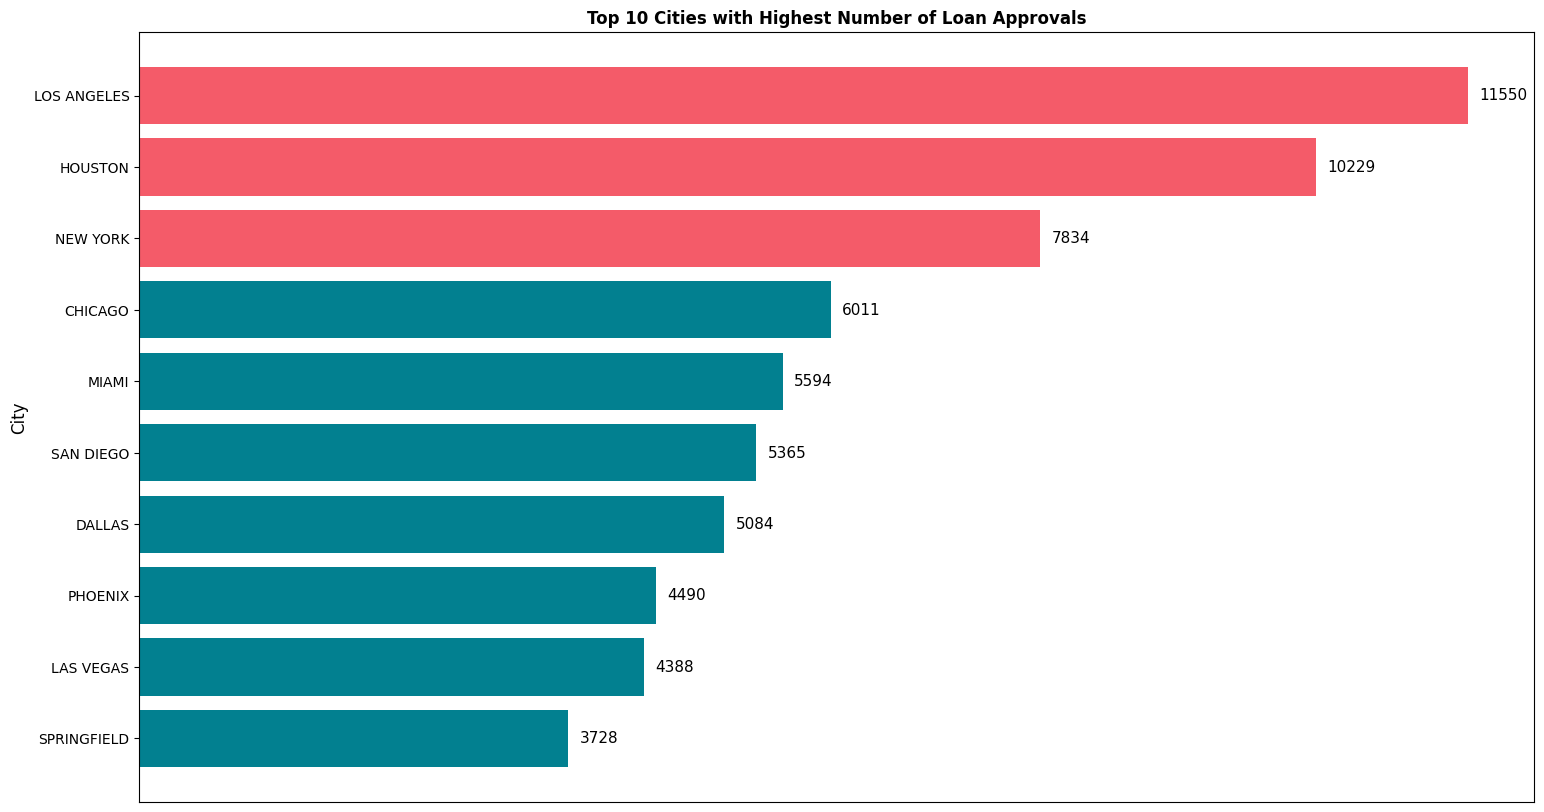

In [7]:
plt.figure(figsize=(10, 6))

# Sort the DataFrame by 'Count' in descending order
selected_cities = selected_cities.sort_values(by='Count', ascending=False)

# Define color palette
colors = ['#F45B69' if count > 7000 else '#028090' for count in selected_cities['Count']]

# Plot
plt.figure(figsize=(18, 10))
bars = plt.barh(selected_cities['City'], selected_cities['Count'], color=colors)
plt.xlabel('')
plt.ylabel('City', fontsize = 12)
plt.title('Top 10 Cities with Highest Number of Loan Approvals', fontweight = 'bold')
plt.gca().invert_yaxis()  # Reverse the y-axis

# Annotate bars with their values
for bar in bars:
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}', va='center', fontsize = 11)

# Remove x-axis ticks
plt.xticks([])

# Show the plot
plt.show()

#### State
- Which states have the highest number of loan approval? 

In [8]:
state_approval = pd.DataFrame({'Count': wdf['State'].value_counts()}).reset_index()
state_approval = state_approval.rename(columns={'index': 'State'})
selected_state_approval = state_approval.head(10)
selected_state_approval 

,State,Count
0,CA,130490
1,TX,70405
2,NY,57395
3,FL,41193
4,PA,34801
5,OH,32498
6,IL,29594
7,MA,25092
8,MN,24359
9,NJ,24010


<Figure size 1000x600 with 0 Axes>

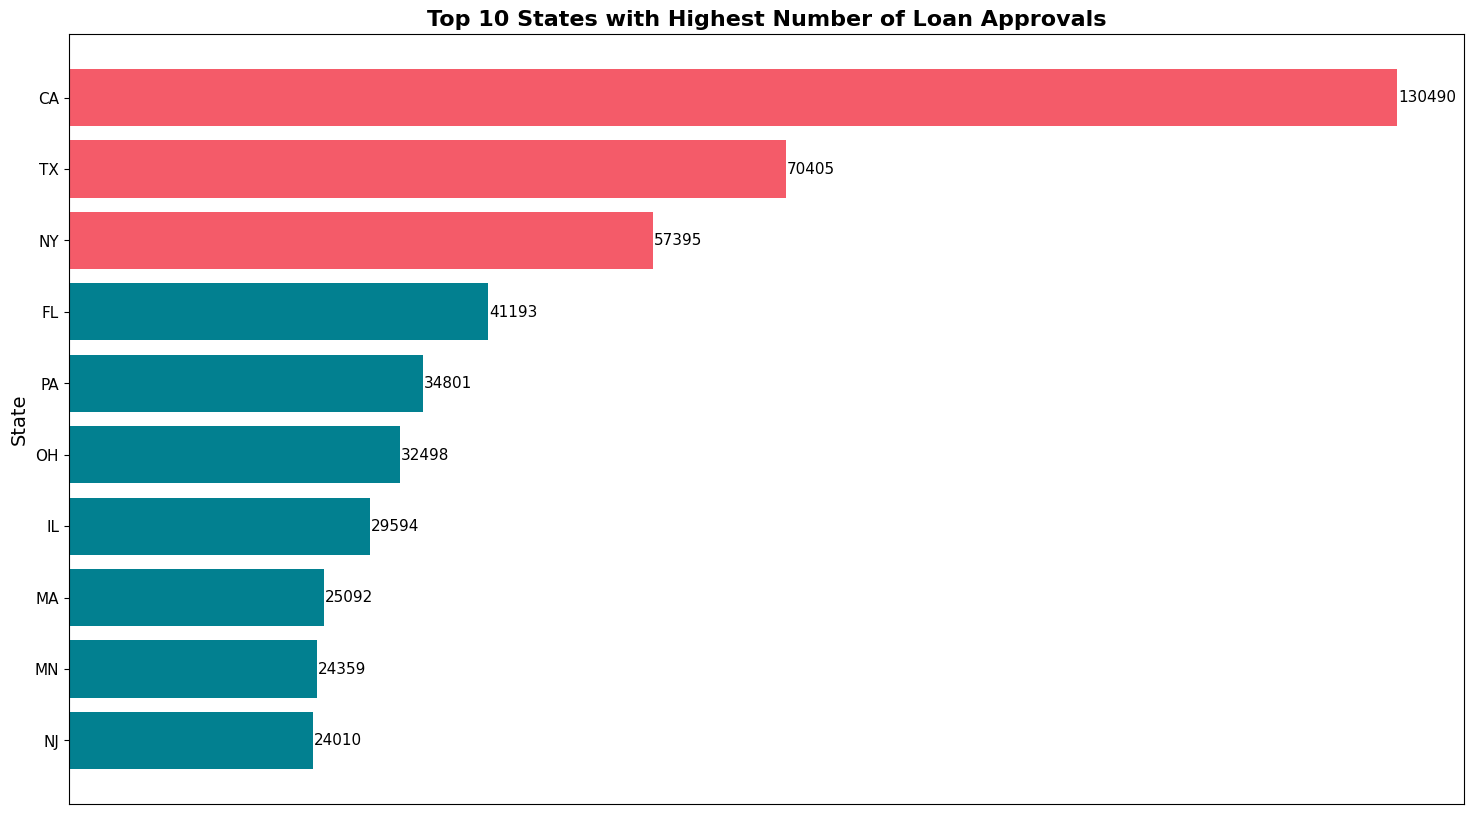

In [9]:
plt.figure(figsize=(10, 6))

# Sort the DataFrame by 'Count' in descending order
selected_state_approval  = selected_state_approval .sort_values(by='Count', ascending=False)

# Define color palette
colors = ['#F45B69' if count > 50000 else '#028090' for count in selected_state_approval['Count']]

# Plot
plt.figure(figsize=(18, 10))
bars = plt.barh(selected_state_approval ['State'], selected_state_approval ['Count'], color=colors)
plt.xlabel('')
plt.ylabel('State', fontsize = 14)
plt.yticks(fontsize = 11)
plt.title('Top 10 States with Highest Number of Loan Approvals', fontweight = 'bold', fontsize = 16)
plt.gca().invert_yaxis()  # Reverse the y-axis

# Annotate bars with their values
for bar in bars:
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}', va='center', fontsize = 11)

# Remove x-axis ticks
plt.xticks([])

# Show the plot
plt.show()

#### Industry
- What industries have the most approved loans? 

In [10]:
industry_approval = pd.DataFrame({'Count': wdf['Industry'].value_counts()}).reset_index()
industry_approval = industry_approval.rename(columns={'index': 'Industry'})
selected_industry_approval = industry_approval.head(10)
selected_industry_approval 

,Industry,Count
0,Other services,274062
1,Retail trade,126975
2,"Professional, scientific, and technical services",67922
3,Manufacturing,67903
4,Accommodation and food services,67511
5,Construction,66492
6,Health care and social assistance,55264
7,Wholesale trade,48673
8,Administrative and support and waste managemen...,32529
9,Transportation and warehousing,22408


<Figure size 1000x600 with 0 Axes>

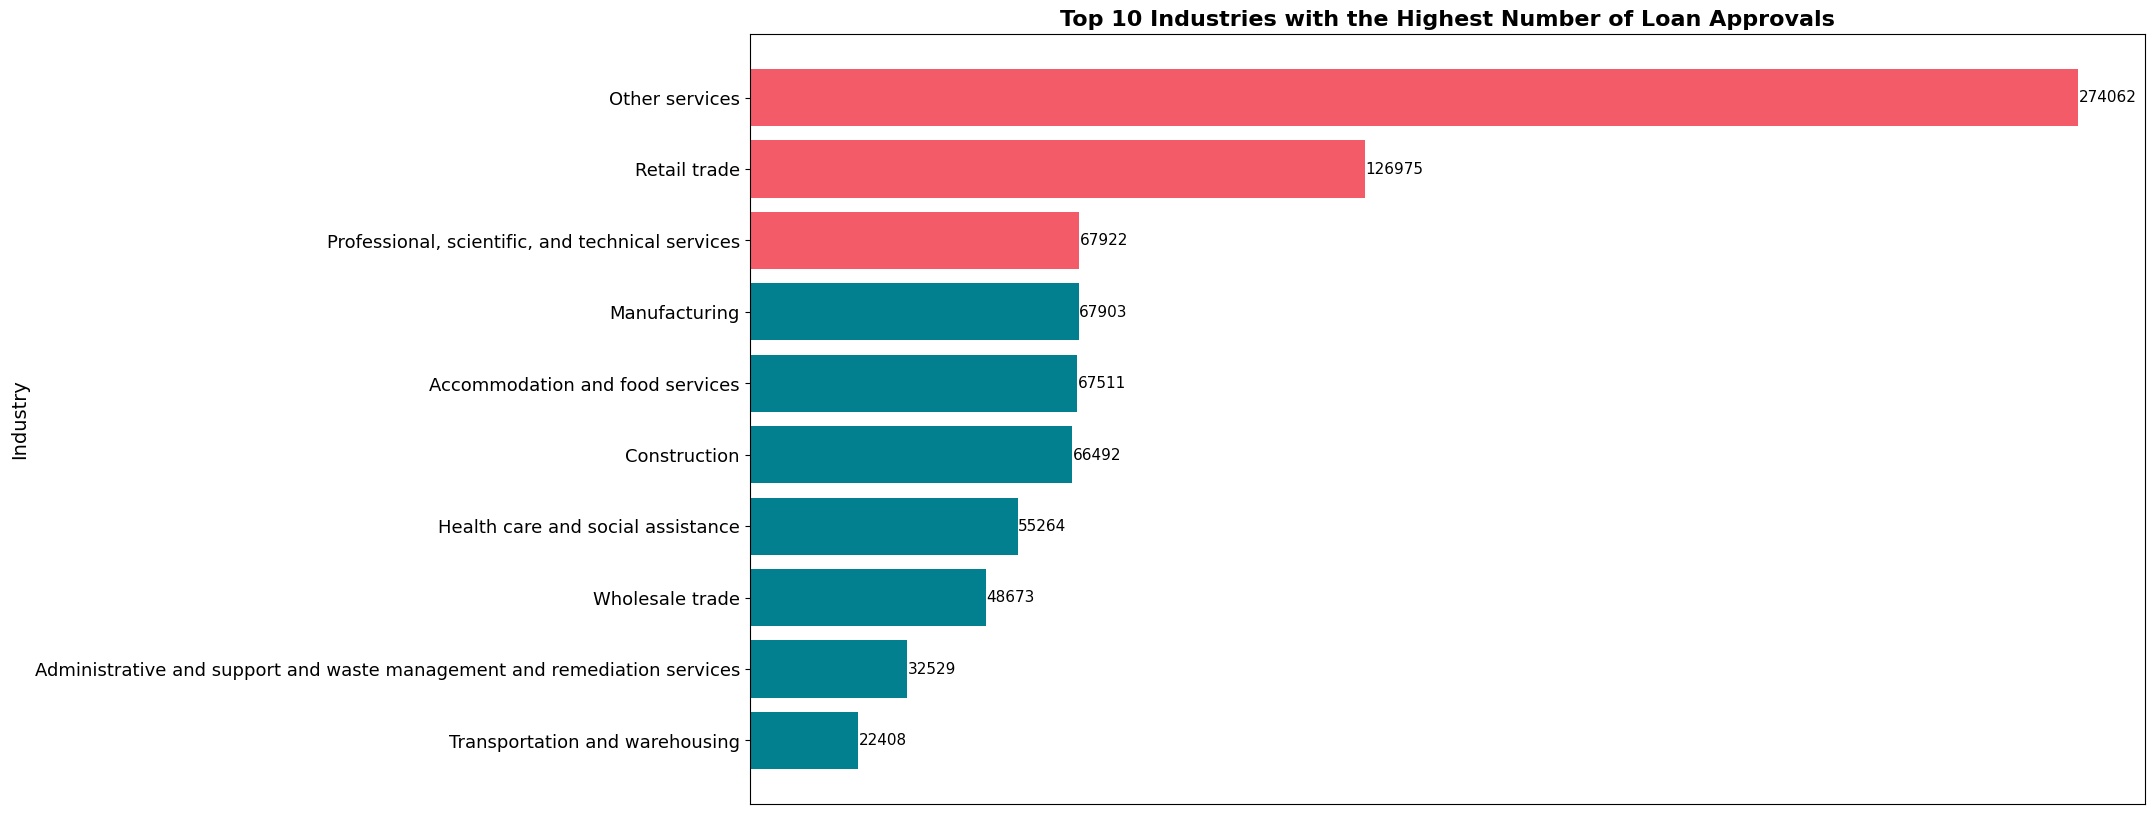

In [11]:
plt.figure(figsize=(10, 6))

# Sort the DataFrame by 'Count' in descending order
selected_industry_approval  = selected_industry_approval .sort_values(by='Count', ascending=False)

# Define color palette
colors = ['#F45B69' if count > 67905 else '#028090' for count in selected_industry_approval['Count']]

# Plot
plt.figure(figsize=(18, 10))
bars = plt.barh(selected_industry_approval['Industry'], selected_industry_approval['Count'], color=colors)
plt.xlabel('')
plt.ylabel('Industry', fontsize = 14)
plt.yticks(fontsize = 13)
plt.title('Top 10 Industries with the Highest Number of Loan Approvals', fontweight = 'bold', fontsize = 16)
plt.gca().invert_yaxis()  # Reverse the y-axis

# Annotate bars with their values
for bar in bars:
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}', va='center', fontsize = 11)

# Remove x-axis ticks
plt.xticks([])

# Show the plot
plt.show()

#### ApprovalFY
- What years were the most loan approved?

In [ ]:
year_approval = pd.DataFrame({'Count': wdf['ApprovalFY'].value_counts()}).reset_index()
year_approval = year_approval.rename(columns={'index': 'ApprovalFY'})
selected_year_approval = year_approval.head(5)
selected_year_approval['ApprovalFY'] = selected_year_approval['ApprovalFY'].apply(lambda x: str(x))
selected_year_approval 

,ApprovalFY,Count
0,2005,76958
1,2006,75756
2,2007,71649
3,2004,68195
4,2003,58000


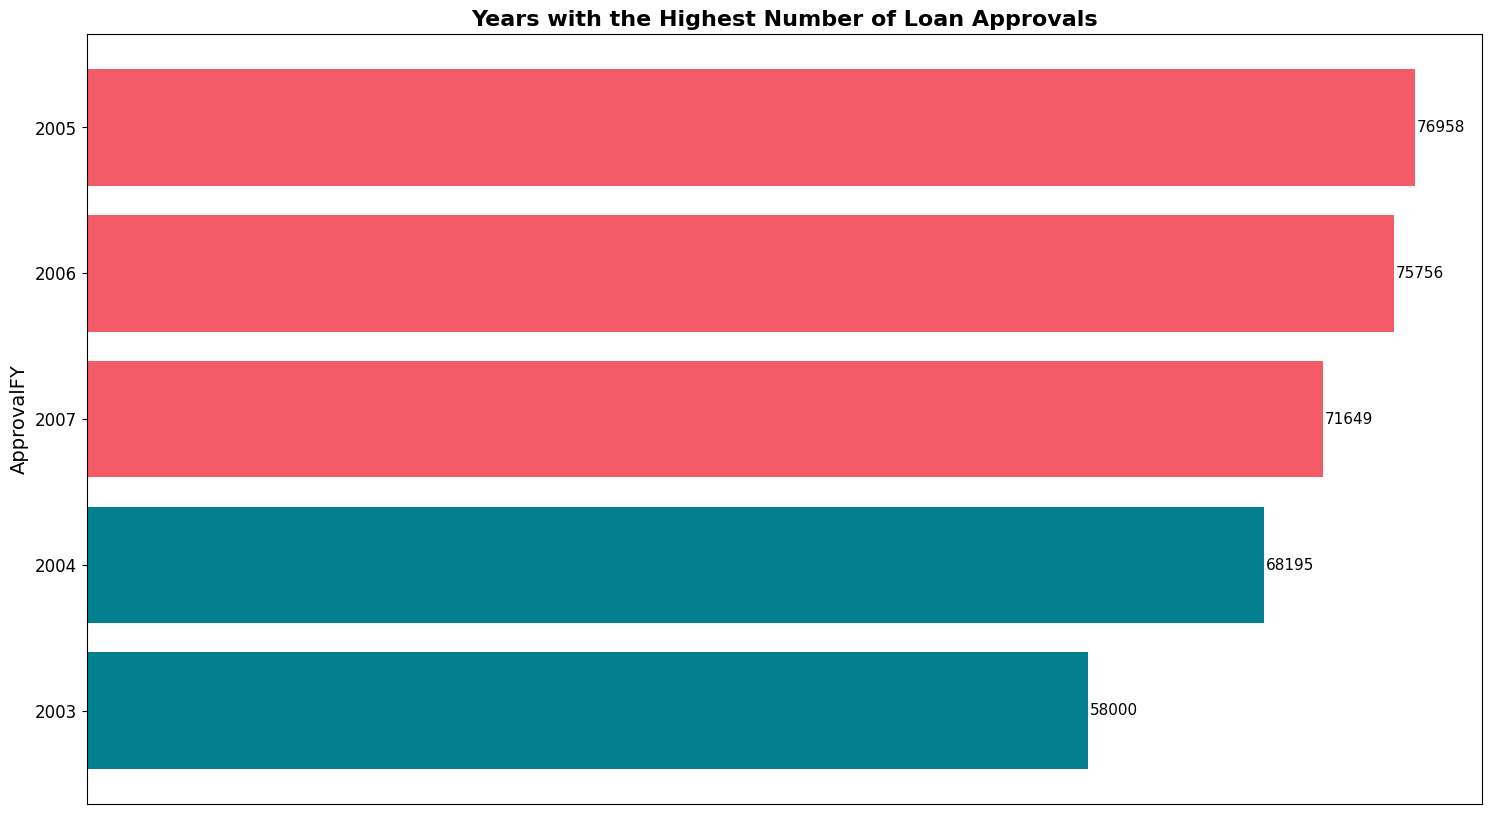

In [35]:


# Create a complete list of years
all_years = pd.DataFrame({'ApprovalFY': [str(year) for year in range(2003, 2008)]})

# Merge with existing DataFrame to include missing years
selected_year_approval = pd.merge(all_years, selected_year_approval, on='ApprovalFY', how='left').fillna(0)

# Convert 'ApprovalFY' to a categorical variable with a specific order
selected_year_approval['ApprovalFY'] = pd.Categorical(selected_year_approval['ApprovalFY'], categories=sorted(selected_year_approval['ApprovalFY']), ordered=True)

# Sort the DataFrame by 'Count' in descending order
selected_year_approval = selected_year_approval.sort_values(by='Count', ascending=False)

# Define color palette
colors = ['#F45B69' if count > 70000 else '#028090' for count in selected_year_approval['Count']]

# Plot
plt.figure(figsize=(18, 10))
bars = plt.barh(selected_year_approval['ApprovalFY'], selected_year_approval['Count'], color=colors)
plt.xlabel('')
plt.ylabel('ApprovalFY', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Years with the Highest Number of Loan Approvals', fontweight='bold', fontsize=16)
plt.gca().invert_yaxis()  # Reverse the y-axis

# Annotate bars with their values
for bar in bars:
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', va='center', fontsize=11)

# Remove x-axis ticks
plt.xticks([])

# Show the plot
plt.show()

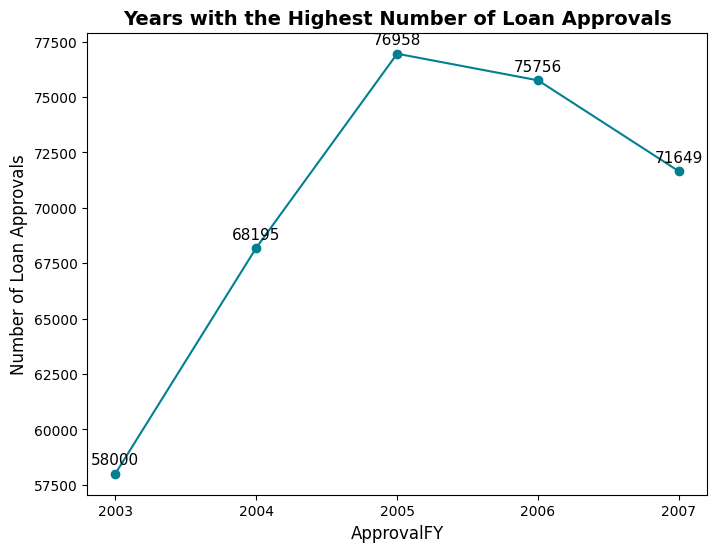

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Provided data
data = {
    'ApprovalFY': ['2005', '2006', '2007', '2004', '2003'],
    'Count': [76958, 75756, 71649, 68195, 58000]
}

# Create DataFrame
selected_year_approval = pd.DataFrame(data)

# Create a complete list of years
all_years = pd.DataFrame({'ApprovalFY': [str(year) for year in range(2003, 2008)]})

# Merge with existing DataFrame to include missing years
selected_year_approval = pd.merge(all_years, selected_year_approval, on='ApprovalFY', how='left').fillna(0)

# Convert 'ApprovalFY' to a categorical variable with a specific order
selected_year_approval['ApprovalFY'] = pd.Categorical(selected_year_approval['ApprovalFY'], categories=sorted(selected_year_approval['ApprovalFY']), ordered=True)

# Sort the DataFrame by 'ApprovalFY' in ascending order
selected_year_approval = selected_year_approval.sort_values(by='ApprovalFY', ascending=True)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(selected_year_approval['ApprovalFY'], selected_year_approval['Count'], marker='o', linestyle='-', color='#028090')

# Annotate points with their values
for i, count in enumerate(selected_year_approval['Count']):
    plt.text(i, count + 400, f'{int(count)}', ha='center', fontsize=11)

plt.xlabel('ApprovalFY', fontsize=12)
plt.ylabel('Number of Loan Approvals', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Years with the Highest Number of Loan Approvals', fontweight='bold', fontsize=14)

# Show the plot
plt.show()

In [17]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv',
       'NAICS_class_code', 'Industry', 'MIS_Status_Encoded', 'LowDoc_Encoded',
       'RevLineCr_Encoded', 'FranchiseCode_Encoded', 'NewExist_Encode',
       'RealEstate_Backed', 'ApprovalDateYear', 'ChgOffDateYear',
       'ApprovalDateMonth', 'DisbursementDateYear', 'UrbanRural_Encoded',
       'Region', 'BankRegion', 'TermDays', 'LoanDateEnd', 'Reccession'],
      dtype='object')

### Loan Approval Trends

### Impact of Economic Conditions

### Loan Performance by Industry

### Loan Amount and Job Creation / Retained Jobs

In [18]:
# Active during recession

